<a href="https://colab.research.google.com/github/SakshiN02/Python-Projects/blob/main/E_Commerce_Sales_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df= pd.read_csv("/content/Ecommerce_Sales_Prediction_Dataset.csv")


In [3]:
df.head(10)

,Date,Product_Category,Price,Discount,Customer_Segment,Marketing_Spend,Units_Sold
0,01-01-2023,Sports,932.80,35.82,Occasional,6780.38,32
1,02-01-2023,Toys,569.48,3.60,Premium,6807.56,16
2,03-01-2023,Home Decor,699.68,3.56,Premium,3793.91,27
3,04-01-2023,Toys,923.27,0.61,Premium,9422.75,29
4,05-01-2023,Toys,710.17,47.83,Premium,1756.83,17
5,06-01-2023,Fashion,161.01,36.88,Premium,5053.56,27
6,07-01-2023,Home Decor,580.53,17.66,Occasional,6939.75,30
7,08-01-2023,Home Decor,610.65,14.83,Regular,7001.64,27
8,09-01-2023,Home Decor,429.89,17.49,Occasional,6521.53,32
9,10-01-2023,Toys,739.08,38.73,Regular,2825.35,28


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date              1000 non-null   object 
 1   Product_Category  1000 non-null   object 
 2   Price             1000 non-null   float64
 3   Discount          1000 non-null   float64
 4   Customer_Segment  1000 non-null   object 
 5   Marketing_Spend   1000 non-null   float64
 6   Units_Sold        1000 non-null   int64  
dtypes: float64(3), int64(1), object(3)
memory usage: 54.8+ KB


DATA CLEANING


In [5]:
df.columns

Index(['Date', 'Product_Category', 'Price', 'Discount', 'Customer_Segment',
       'Marketing_Spend', 'Units_Sold'],
      dtype='object')

In [6]:
df.isnull().sum()

,0
Date,0
Product_Category,0
Price,0
Discount,0
Customer_Segment,0
Marketing_Spend,0
Units_Sold,0


In [7]:
#CHANGING THE DATATYPES OF NECESSARY COLUMNS
df["Date"] = pd.to_datetime(df['Date'] , format='%d-%m-%Y')


In [8]:

#WE CAN ALSO EXTRACT MONTH AND YEAR
df["Month"] = df["Date"].dt.month
df["Year"] = df["Date"].dt.year

In [9]:
df.head(10)

,Date,Product_Category,Price,Discount,Customer_Segment,Marketing_Spend,Units_Sold,Month,Year
0,2023-01-01,Sports,932.80,35.82,Occasional,6780.38,32,1,2023
1,2023-01-02,Toys,569.48,3.60,Premium,6807.56,16,1,2023
2,2023-01-03,Home Decor,699.68,3.56,Premium,3793.91,27,1,2023
3,2023-01-04,Toys,923.27,0.61,Premium,9422.75,29,1,2023
4,2023-01-05,Toys,710.17,47.83,Premium,1756.83,17,1,2023
5,2023-01-06,Fashion,161.01,36.88,Premium,5053.56,27,1,2023
6,2023-01-07,Home Decor,580.53,17.66,Occasional,6939.75,30,1,2023
7,2023-01-08,Home Decor,610.65,14.83,Regular,7001.64,27,1,2023
8,2023-01-09,Home Decor,429.89,17.49,Occasional,6521.53,32,1,2023
9,2023-01-10,Toys,739.08,38.73,Regular,2825.35,28,1,2023


In [10]:
#Detecting the outliers
# Price Column - IQR Method
Q1_price = df['Price'].quantile(0.25)
Q3_price = df['Price'].quantile(0.75)
IQR_price = Q3_price - Q1_price
lower_bound_price = Q1_price - 1.5 * IQR_price
upper_bound_price = Q3_price + 1.5 * IQR_price

# Discount Column - IQR Method
Q1_discount = df['Discount'].quantile(0.25)
Q3_discount = df['Discount'].quantile(0.75)
IQR_discount = Q3_discount - Q1_discount
lower_bound_discount = Q1_discount - 1.5 * IQR_discount
upper_bound_discount = Q3_discount + 1.5 * IQR_discount

# Units_Sold Column - IQR Method
Q1_units_sold = df['Units_Sold'].quantile(0.25)
Q3_units_sold = df['Units_Sold'].quantile(0.75)
IQR_units_sold = Q3_units_sold - Q1_units_sold
lower_bound_units_sold = Q1_units_sold - 1.5 * IQR_units_sold
upper_bound_units_sold = Q3_units_sold + 1.5 * IQR_units_sold

# Identify outliers
outliers_price = df[(df['Price'] < lower_bound_price) | (df['Price'] > upper_bound_price)]
outliers_discount = df[(df['Discount'] < lower_bound_discount) | (df['Discount'] > upper_bound_discount)]
outliers_units_sold = df[(df['Units_Sold'] < lower_bound_units_sold) | (df['Units_Sold'] > upper_bound_units_sold)]

# Display the outliers
print("Outliers in Price:")
print(outliers_price)

print("\nOutliers in Discount:")
print(outliers_discount)

print("\nOutliers in Units Sold:")
print(outliers_units_sold)

Outliers in Price:
Empty DataFrame
Columns: [Date, Product_Category, Price, Discount, Customer_Segment, Marketing_Spend, Units_Sold, Month, Year]
Index: []

Outliers in Discount:
Empty DataFrame
Columns: [Date, Product_Category, Price, Discount, Customer_Segment, Marketing_Spend, Units_Sold, Month, Year]
Index: []

Outliers in Units Sold:
          Date Product_Category   Price  Discount Customer_Segment  \
138 2023-05-19          Fashion  179.96     33.82       Occasional   
261 2023-09-19       Home Decor  407.91     20.59       Occasional   
522 2024-06-06           Sports   90.81     21.09       Occasional   
544 2024-06-28      Electronics  265.11     37.56       Occasional   
641 2024-10-03             Toys  707.63     17.02       Occasional   

     Marketing_Spend  Units_Sold  Month  Year  
138          2044.55          50      5  2023  
261          7091.84           5      9  2023  
522          7123.44          52      6  2024  
544          4476.86          50      6  2024 

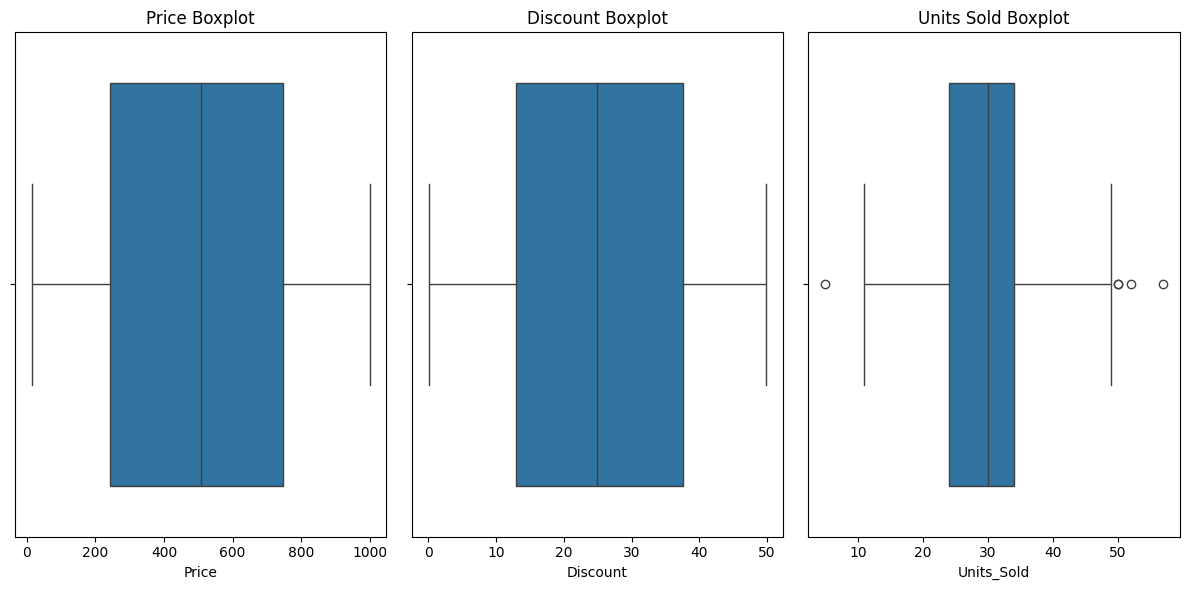

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot for each column to visualize outliers
plt.figure(figsize=(12, 6))

# Price Boxplot
plt.subplot(1, 3, 1)
sns.boxplot(x=df['Price'])
plt.title('Price Boxplot')

# Discount Boxplot
plt.subplot(1, 3, 2)
sns.boxplot(x=df['Discount'])
plt.title('Discount Boxplot')

# Units Sold Boxplot
plt.subplot(1, 3, 3)
sns.boxplot(x=df['Units_Sold'])
plt.title('Units Sold Boxplot')

plt.tight_layout()
plt.show()


In [12]:
# Remove outliers in the 'Price' column
df = df[(df['Price'] >= lower_bound_price) & (df['Price'] <= upper_bound_price)]

# Remove outliers in the 'Discount' column
df = df[(df['Discount'] >= lower_bound_discount) & (df['Discount'] <= upper_bound_discount)]

# Remove outliers in the 'Units_Sold' column
df = df[(df['Units_Sold'] >= lower_bound_units_sold) & (df['Units_Sold'] <= upper_bound_units_sold)]


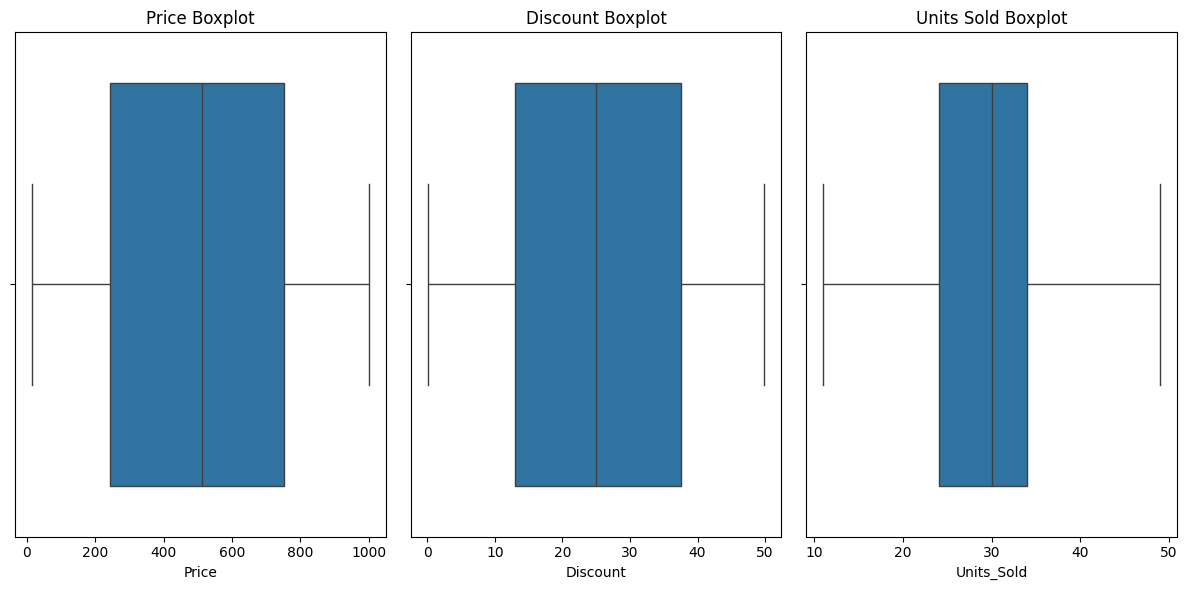

In [13]:
#cleaned dataset
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot for each column to visualize outliers
plt.figure(figsize=(12, 6))

# Price Boxplot
plt.subplot(1, 3, 1)
sns.boxplot(x=df['Price'])
plt.title('Price Boxplot')

# Discount Boxplot
plt.subplot(1, 3, 2)
sns.boxplot(x=df['Discount'])
plt.title('Discount Boxplot')

# Units Sold Boxplot
plt.subplot(1, 3, 3)
sns.boxplot(x=df['Units_Sold'])
plt.title('Units Sold Boxplot')

plt.tight_layout()
plt.show()


STATISTICAL ANALYSIS

In [14]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
Date,995,2024-05-14 21:26:35.577889536,2023-01-01 00:00:00,2023-09-07 12:00:00,2024-05-14 00:00:00,2025-01-20 12:00:00,2025-09-26 00:00:00,NaN
Price,995.0,506.121106,14.59,244.095,512.16,752.31,999.42,289.849332
Discount,995.0,24.914241,0.01,12.975,25.02,37.62,49.92,14.464584
Marketing_Spend,995.0,4911.815196,100.3,2412.01,4837.06,7329.335,9995.62,2844.546432
Units_Sold,995.0,29.564824,11.0,24.0,30.0,34.0,49.0,7.098089
Month,995.0,6.094472,1.0,3.0,6.0,9.0,12.0,3.311938
Year,995.0,2023.905528,2023.0,2023.0,2024.0,2025.0,2025.0,0.791758


In [15]:
# Frequency counts for categorical data
df['Customer_Segment'].value_counts()


,count
Customer_Segment,
Regular,345
Occasional,334
Premium,316


In [16]:
df['Product_Category'].value_counts()

,count
Product_Category,
Electronics,209
Sports,205
Toys,203
Home Decor,189
Fashion,189


DATA DISTRIBUTION

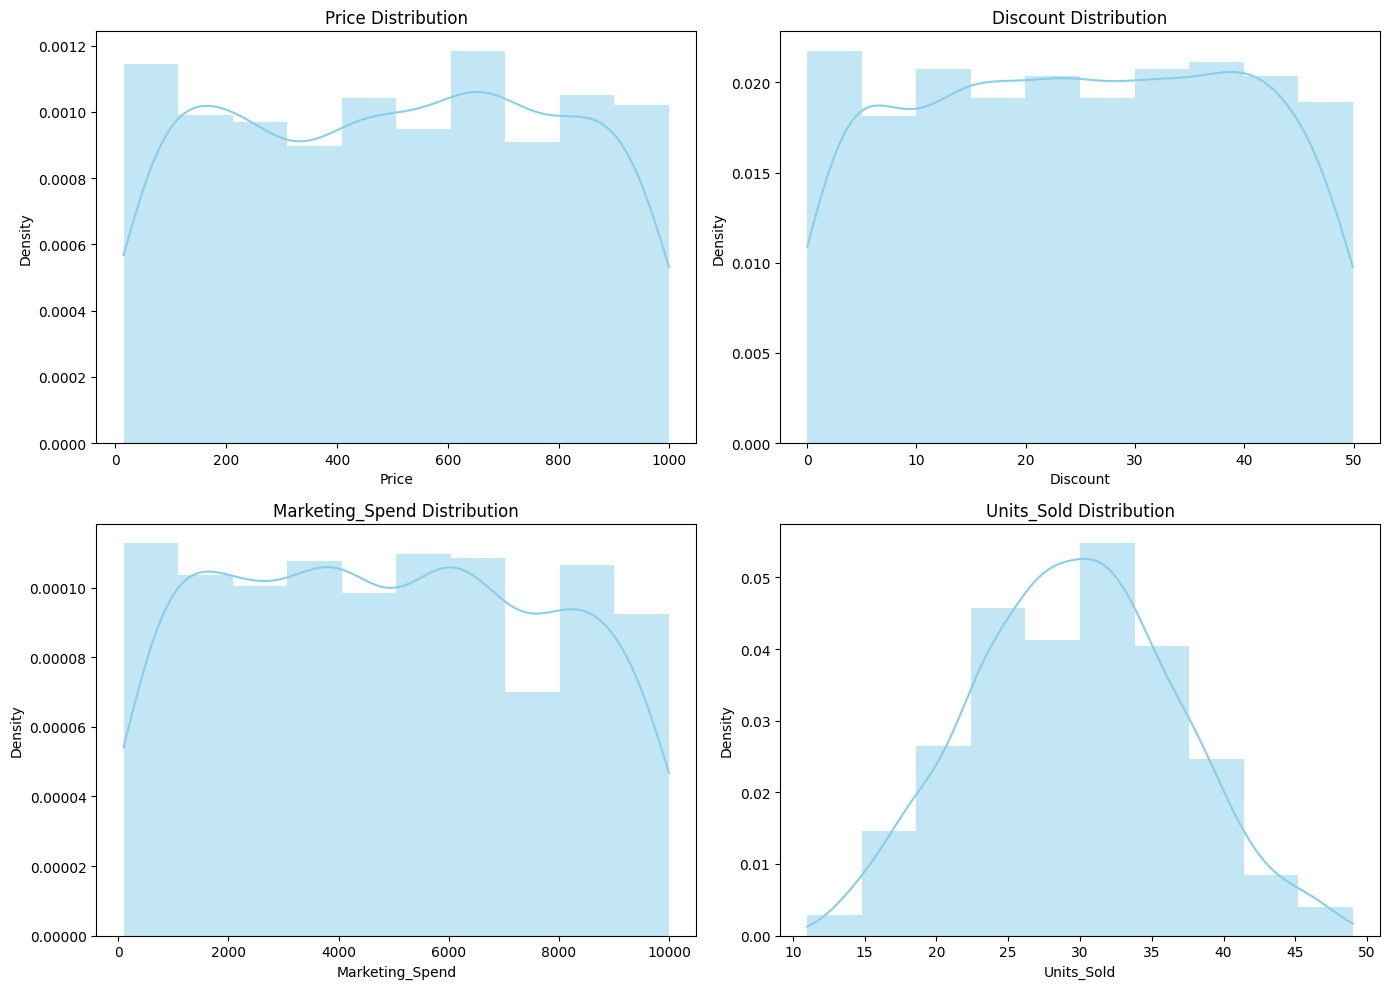

In [17]:
# Set up the matplotlib figure for distribution visualization
plt.figure(figsize=(14, 10))

# Plot for 'Price' Distribution and KDE
plt.subplot(2, 2, 1)
sns.histplot(df['Price'], kde=True, bins=10, color='skyblue', stat='density', linewidth=0)
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Density')

# Plot for 'Discount' Distribution and KDE
plt.subplot(2, 2, 2)
sns.histplot(df['Discount'], kde=True, bins=10, color='skyblue', stat='density', linewidth=0)
plt.title('Discount Distribution')
plt.xlabel('Discount')
plt.ylabel('Density')

# Plot for 'Marketing_Spend' Distribution and KDE
plt.subplot(2, 2, 3)
sns.histplot(df['Marketing_Spend'], kde=True, bins=10, color='skyblue', stat='density', linewidth=0)
plt.title('Marketing_Spend Distribution')
plt.xlabel('Marketing_Spend')
plt.ylabel('Density')

# Plot for 'Units_Sold' Distribution and KDE
plt.subplot(2, 2, 4)
sns.histplot(df['Units_Sold'], kde=True, bins=10, color='skyblue', stat='density', linewidth=0)
plt.title('Units_Sold Distribution')
plt.xlabel('Units_Sold')
plt.ylabel('Density')

# Display all the plots for distributions
plt.tight_layout()
plt.show()

INSIGHTS-

Price,Discount,marketing spend(Positive skew): The right tail (larger values) is longer than the left, and the distribution leans towards the left.

Units_sold(Negative skew): The left tail (smaller values) is longer than the right, and the distribution leans towards the right.

CORRELATION MATRIX

In [18]:
df_numerical = df.select_dtypes(include = ['Float64','int64'])
correlation_matrix = df_numerical.corr()
correlation_matrix

,Price,Discount,Marketing_Spend,Units_Sold
Price,1.000000,0.032189,-0.002783,0.021794
Discount,0.032189,1.000000,0.012017,-0.035772
Marketing_Spend,-0.002783,0.012017,1.000000,0.013398
Units_Sold,0.021794,-0.035772,0.013398,1.000000


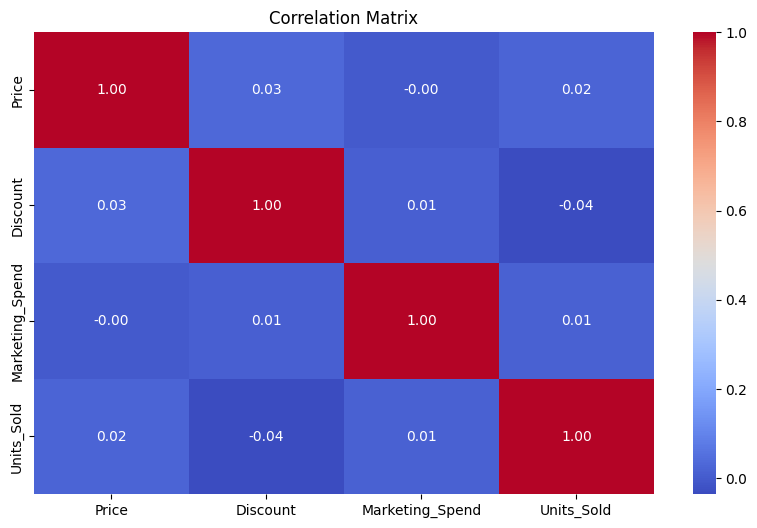

In [19]:
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

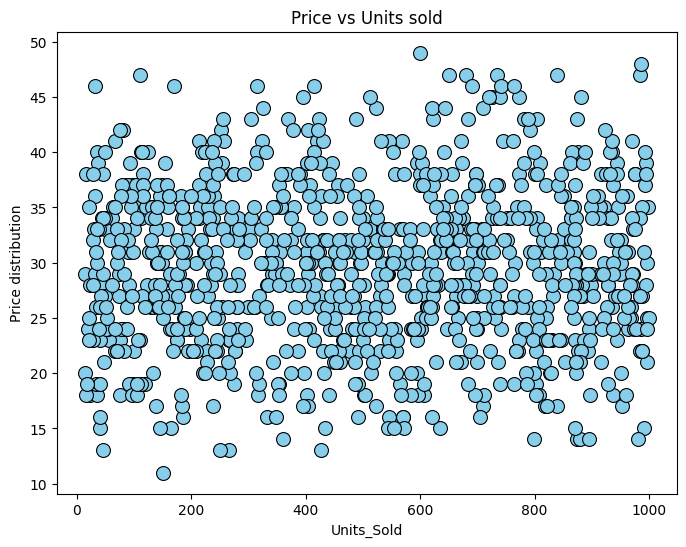

In [20]:
#Scatter plot of Price vs Units sold
plt.figure(figsize=(8,6))
sns.scatterplot(y = "Units_Sold", x = "Price", data = df,color='skyblue', s=100, edgecolor='black')

# Set plot title and labels
plt.title("Price vs Units sold")
plt.ylabel("Price distribution")
plt.xlabel("Units_Sold")

# Display the plot
plt.show()

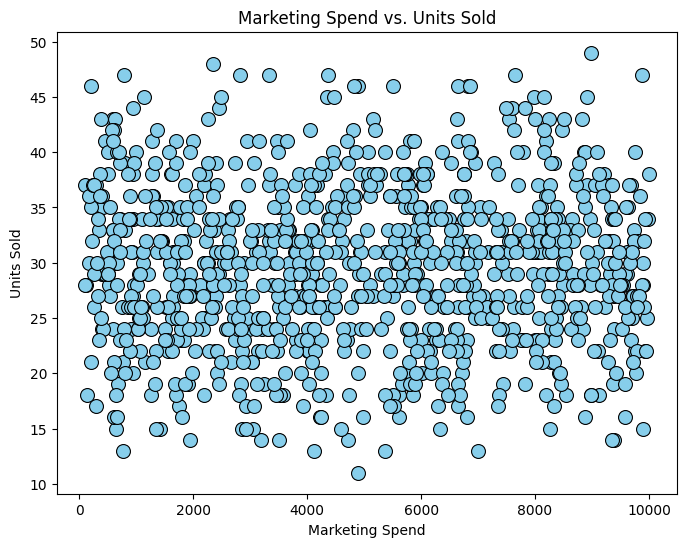

In [21]:

# Scatter plot of Marketing_Spend vs. Units_Sold
plt.figure(figsize=(8, 6))
sns.scatterplot(x="Marketing_Spend", y="Units_Sold", data=df, color='skyblue', s=100, edgecolor='black')

# Set plot title and labels
plt.title("Marketing Spend vs. Units Sold")
plt.xlabel("Marketing Spend")
plt.ylabel("Units Sold")

# Display the plot
plt.show()

In [22]:
#Importing the necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler


In [23]:
# Encode categorical variables (e.g., Customer_Segment) using one-hot encoding
df = pd.get_dummies(df, columns=['Customer_Segment'], drop_first=True)

# Define features (X) and target variable (y)
X = df[['Price', 'Discount', 'Marketing_Spend'] + [col for col in df if 'Customer_Segment' in col]]
y = df['Units_Sold']

In [24]:
# Split the dataset into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features for better model performance
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [26]:
# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict the target variable on the test set
y_pred = model.predict(X_test)
y_pred

array([29.22098419, 29.75321351, 29.74050057, 29.54910131, 29.29851537,
       29.03040118, 30.10102331, 29.56388024, 28.71810797, 29.96988111,
       29.53415986, 29.38598452, 30.02853095, 29.46645463, 29.7177059 ,
       29.47088677, 29.36710306, 29.80269092, 29.30158912, 28.76506941,
       29.89905932, 29.28170805, 29.72411668, 29.10803192, 29.24634336,
       29.66651983, 29.93446089, 29.78292627, 29.24504393, 28.80658493,
       29.90339599, 28.54199007, 30.04163569, 29.30733084, 29.56535159,
       29.5380861 , 29.69962826, 30.01255257, 29.60693935, 29.84971428,
       29.53359013, 29.84263523, 30.07016256, 30.11103997, 29.46893639,
       29.71799597, 29.8082739 , 30.06106622, 29.72043927, 29.63817187,
       29.40442131, 28.9506772 , 30.21321596, 28.70019062, 29.97813432,
       29.61896764, 29.40263771, 29.54141083, 29.69407965, 29.97615786,
       29.308027  , 29.72446551, 29.71515426, 29.49449823, 28.99709761,
       29.30006699, 30.04036224, 28.8542414 , 29.20453566, 29.52

In [27]:
# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 53.90289442437445
R-squared: 0.013837213059627373


In [28]:
# Making predictions for new data
# Example: Predicting for a new data point
# Example input: Price=20, Discount=5, Marketing_Spend=1000, and Customer_Segment values encoded (e.g., 1 for segment 1, 0 for segment 2)
new_data = np.array([[20, 5, 1000, 1, 0]])  # Example values for Price, Discount, Marketing Spend, and one-hot encoded Customer Segment
new_data_scaled = scaler.transform(new_data)
prediction = model.predict(new_data_scaled)

print("Prediction for new data:", prediction)

Prediction for new data: [29.70600276]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
